In [43]:
from os import path
from PIL import Image
from colorthief import ColorThief
import numpy as np

In [59]:
DATAPATH = '../goforest/labeled_images/unlabeled'
TEST_IMAGE = 'kishan_bagh_nolabels.png'

PALETTE_SIZE = 5
MOST_GREEN = 2

In [75]:
def greenness_rgb(color):
    r, g, b = color
    return g/max(1,b) + g/max(1,r)

greenness_rgb((161, 186, 97))

3.0728052763014664

In [70]:
image_path = path.join(DATAPATH, TEST_IMAGE)

image = Image.open(image_path)
ct = ColorThief(image_path)
palette = ct.get_palette(color_count=PALETTE_SIZE)
palette.sort(key = lambda x: greenness_rgb(x), reverse = True)
print(palette)

[(45, 66, 34), (161, 186, 97), (115, 108, 76), (190, 168, 129), (223, 225, 210)]


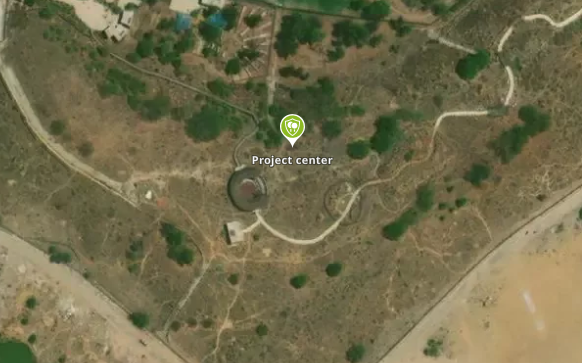

In [39]:
display(image)

3.0728052763014664

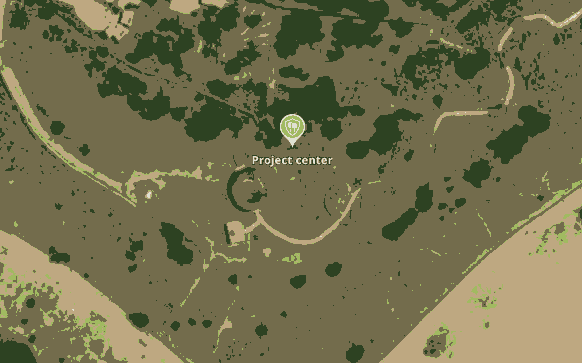

In [72]:
image_copy = image.copy()
image_size = image.width * image.height
#new_pixels = []

for row_nr in range(image_copy.height):
    for col_nr in range(image_copy.width):
        position = (col_nr, row_nr)
        best_fit, pixel, min_distance = palette[0], image.getpixel(position), 2 ** 24
        
        for color in palette:
            distance = np.linalg.norm(np.array(color) - np.array(pixel))
            
            if distance < min_distance:
                min_distance = distance
                best_fit = color
                
        image_copy.putpixel(position, best_fit)

#image_copy = Image.fromarray(np.array(new_pixels).astype('uint8'), 'RGB')
image_copy.save(TEST_IMAGE + "new.png")
image_to_list = list(image_copy.getdata())

display(image_copy)
    

In [74]:
image_to_list = list(image_copy.getdata())

first_green_percentage = 100 * image_to_list.count(palette[0]) / image_size
secondary_green_percentage = 100 * image_to_list.count(palette[1]) / image_size

print(f'Main green: {first_green_percentage}%')
print(f'Secondary green: {secondary_green_percentage}%')
print(f'Total coverage: {first_green_percentage + secondary_green_percentage}%')

Main green: 16.708793653498432%
Secondary green: 2.5228858405990553%
